# Climate Change Prediction

## Exploratory Data Analysis

### Import and Reading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
sns.set()

In [3]:
data = pd.read_csv("climate_change.csv")

### Data Understanding

In [4]:
data.shape

(308, 11)

In [5]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [6]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [7]:
data.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [8]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [9]:
data.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

### Feature Relationship

In [10]:
corr_matrix = data.corr()

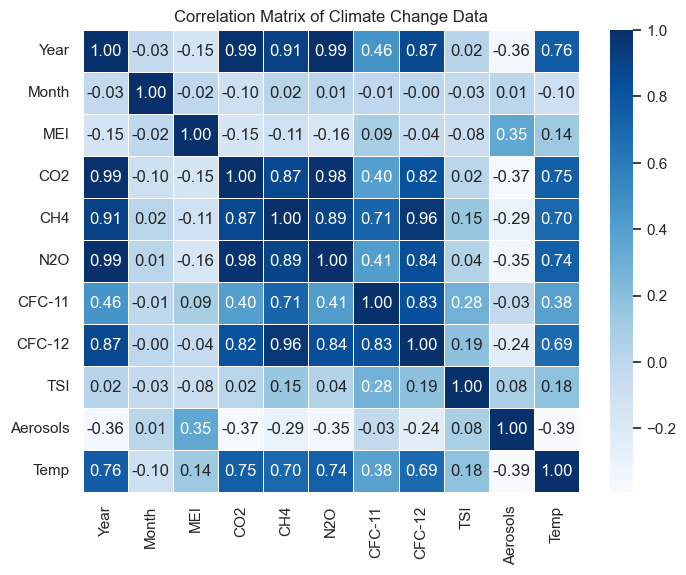

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Matrix of Climate Change Data")
plt.show()

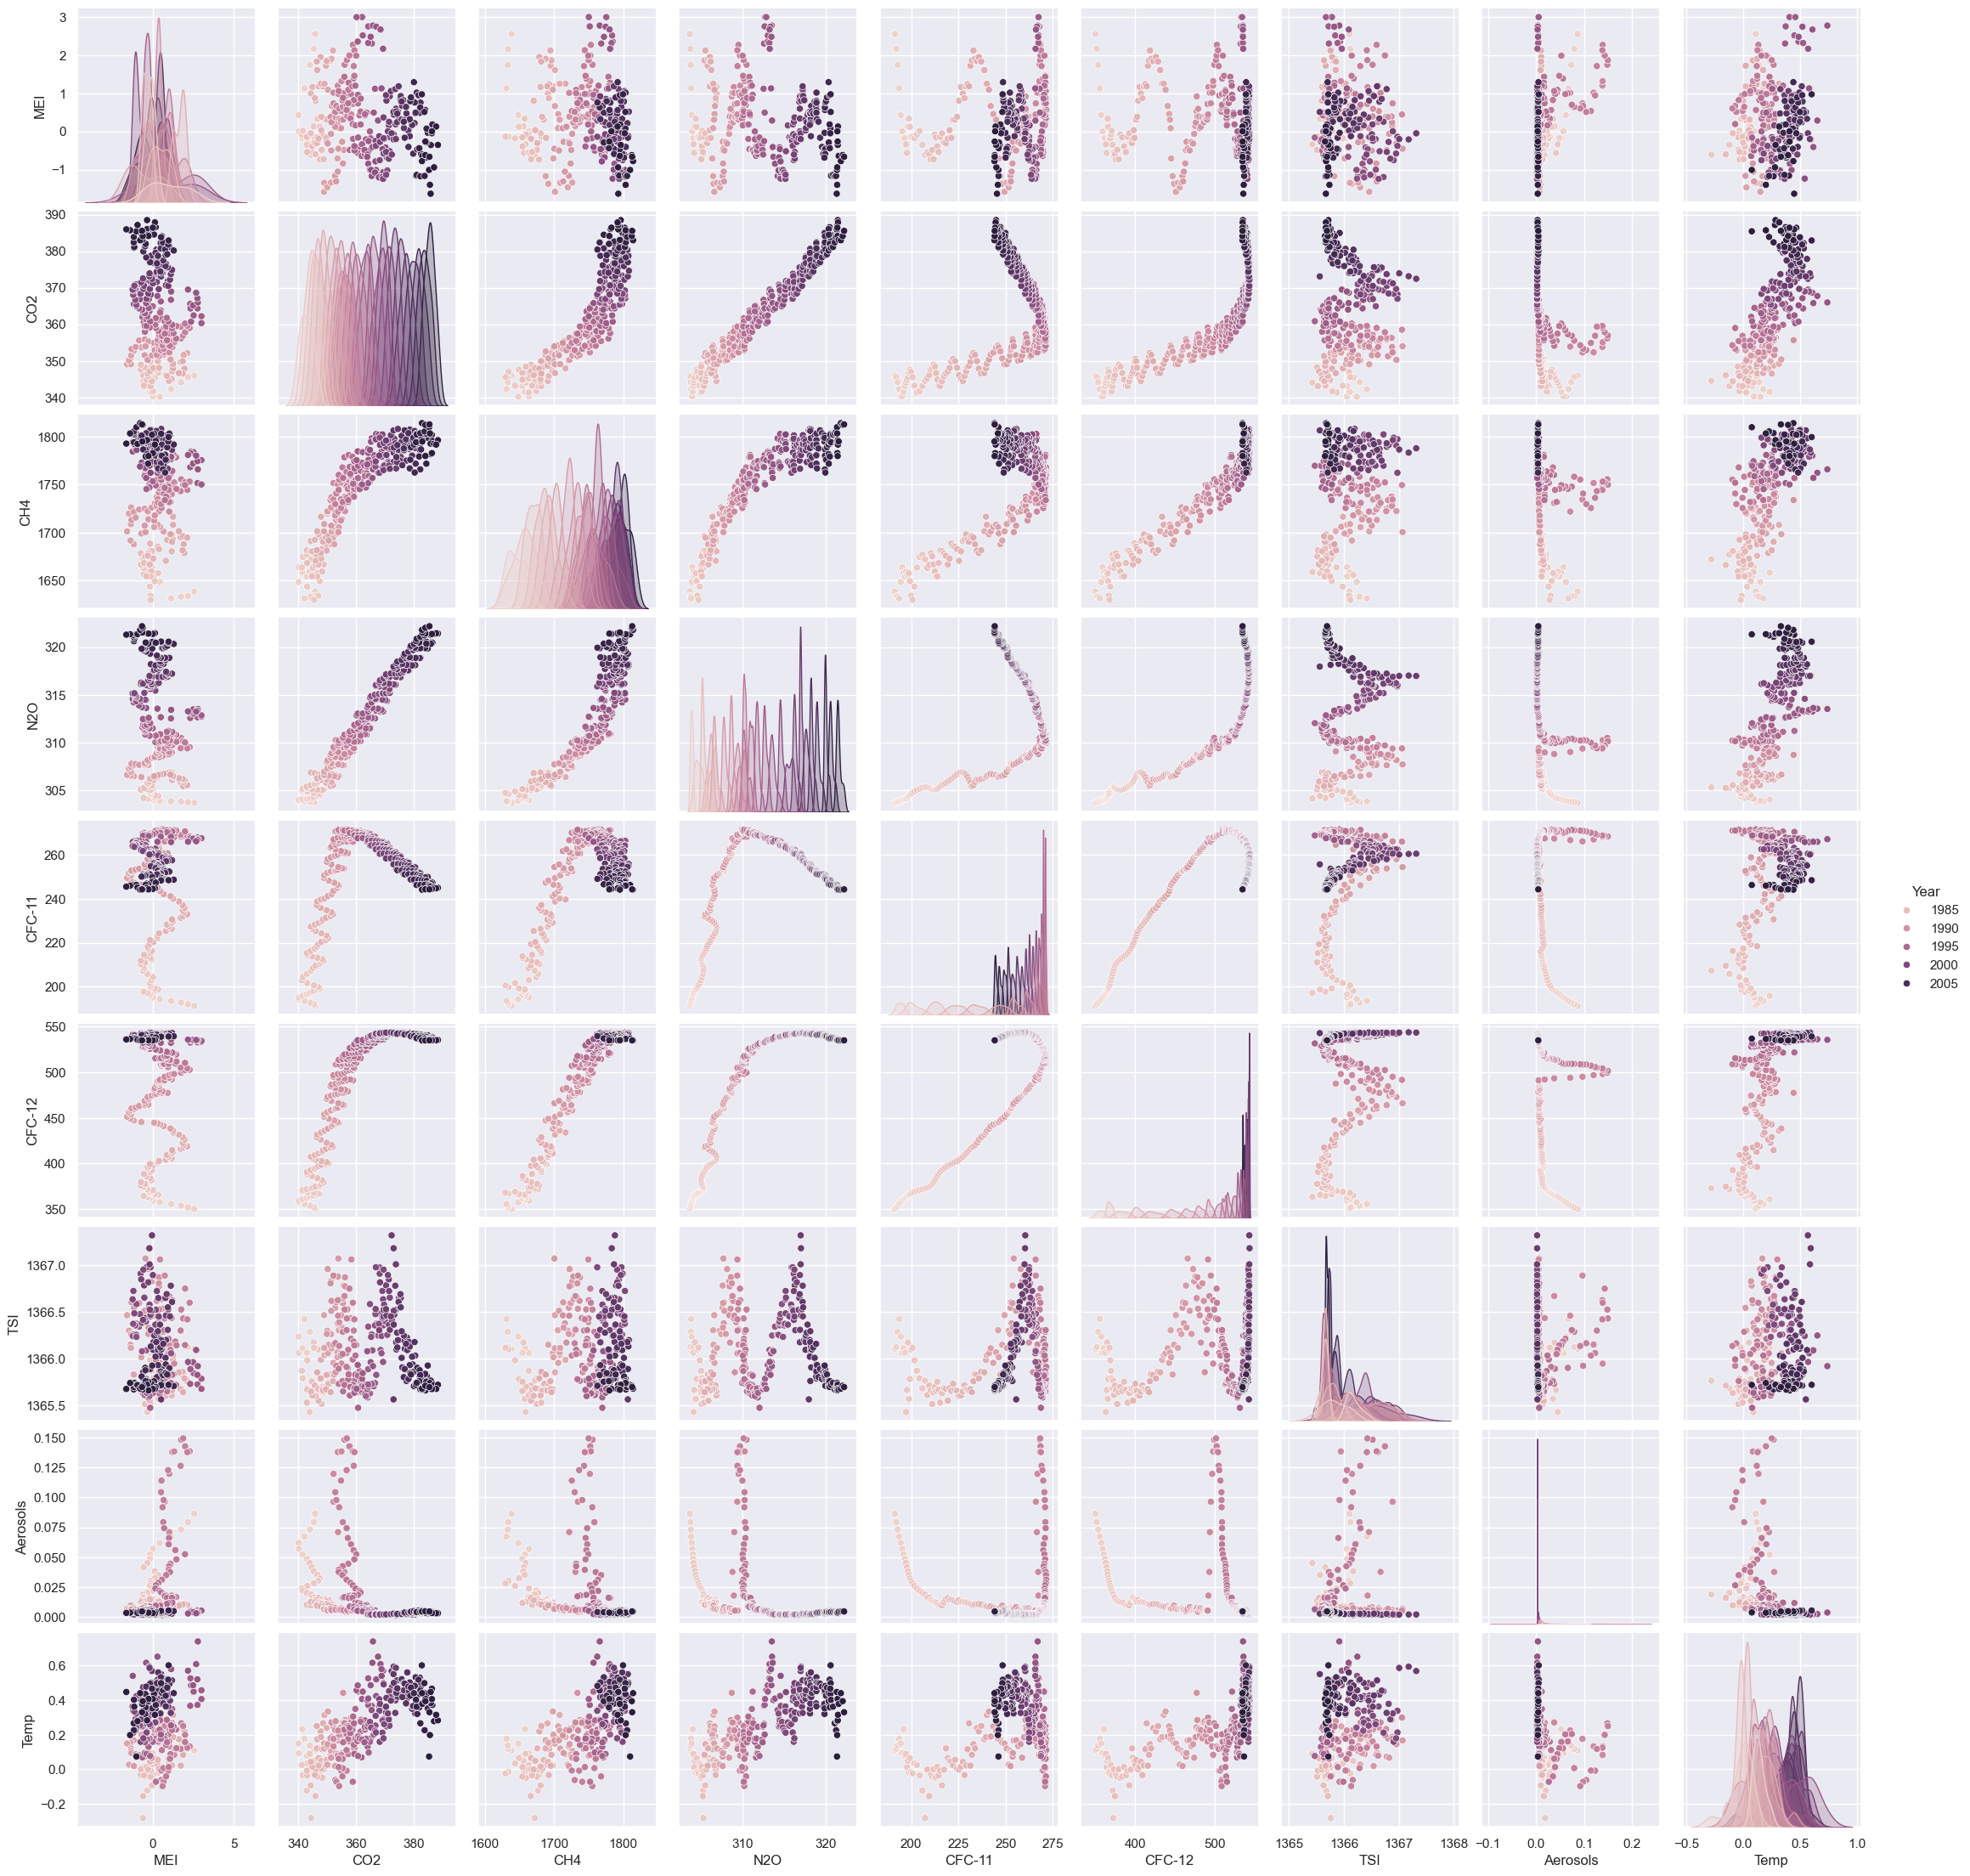

In [12]:
sns.pairplot(data, vars=['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols', 'Temp'], hue="Year")
plt.show()

In [13]:
X = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y = data["Temp"]

### Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("X_set for training shape:", X_train.shape)
print("X_set for testing shape:", X_test.shape)
print("y_set for training shape:", y_train.shape)
print("y_set for testing shape:", y_test.shape)

X_set for training shape: (246, 8)
X_set for testing shape: (62, 8)
y_set for training shape: (246,)
y_set for testing shape: (62,)


In [16]:
y_test = y_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [17]:
print("y_set for training shape:", y_train.shape)
print("y_set for testing shape:", y_test.shape)

y_set for training shape: (246, 1)
y_set for testing shape: (62, 1)


### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Coefficients and Intercept 

In [20]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [[ 0.05703443  0.06279974  0.00530514 -0.0856635  -0.14485646  0.24675817
   0.0327223  -0.0426875 ]]
Model Intercept: [0.25957724]


### Model Evaluation

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.009752754753819691
R² Score: 0.6979288977936192


Mean Squared Error (MSE): Measures how much predictions deviate from actual values (Lower is better).
R² Score: Explains how well the model fits the data (Closer to 1 is better).
- If R² is high (~0.8 or above) → The model explains most of the variation.
- If R² is low (~0.4 or below) → The model may not capture all important factors.

### Residual Plot

A residual plot helps visualize how well your model is fitting the data by showing the difference between actual and predicted values. If the residuals (errors) are randomly scattered around zero, your model is performing well.

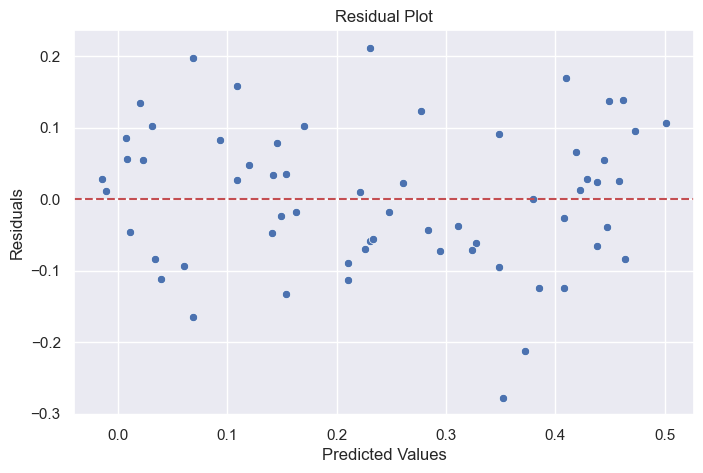

In [22]:
# Ensure y_pred and y_test are 1D arrays
y_pred = y_pred.flatten() if y_pred.ndim > 1 else y_pred
y_test = y_test.flatten() if y_test.ndim > 1 else y_test

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Visualize Predictions

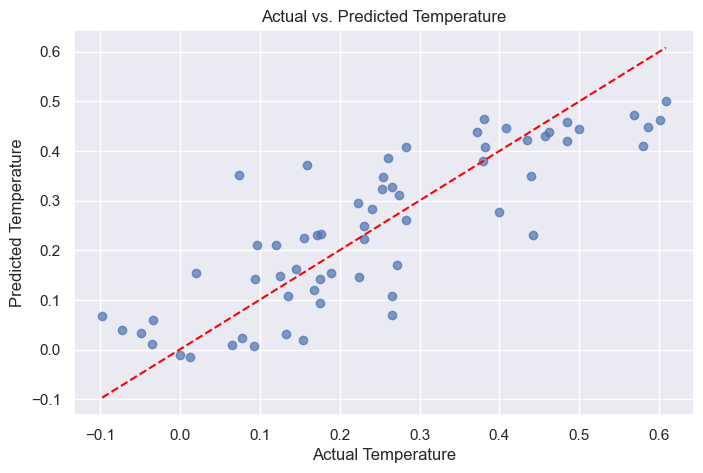

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs. Predicted Temperature")
plt.show()

### Regression Plot: Feature vs. Target

#### CO₂ vs. Temperature

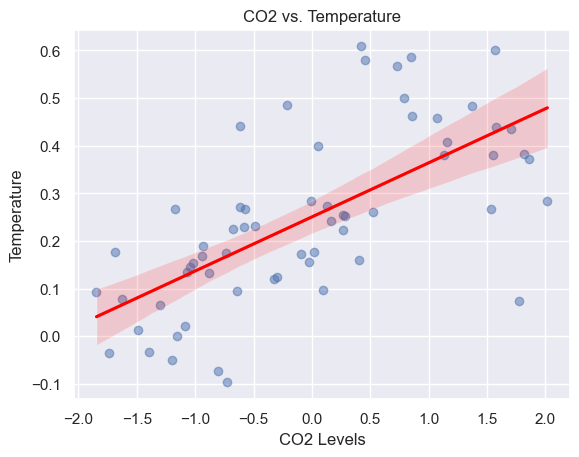

In [24]:
sns.regplot(x=X_test[:,1], y=y_test, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("CO2 Levels")
plt.ylabel("Temperature")
plt.title("CO2 vs. Temperature")
plt.show()

Higher CO₂ levels are associated with higher temperatures, supporting the idea that rising CO₂ contributes to global warming.

#### Year vs. Temperature

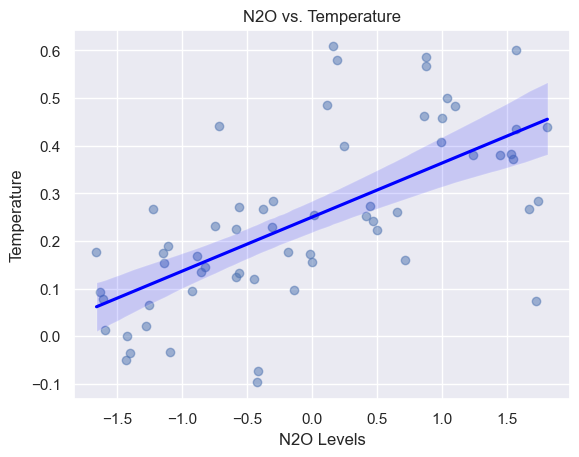

In [25]:
sns.regplot(x=X_test[:,3], y=y_test, scatter_kws={"alpha":0.5}, line_kws={"color":"blue"})
plt.xlabel("N2O Levels")
plt.ylabel("Temperature")
plt.title("N2O vs. Temperature")
plt.show()

As the years progress, global temperature increases, which is consistent with climate change trends.

Key Takeaways
- Both CO₂ and Year are positively correlated with Temperature.
- CO₂ has a direct impact—higher CO₂ = higher temperatures.
- Year indirectly captures the effect—as time progresses, CO₂ emissions rise, leading to temperature increases.
- The model effectively captures these trends but some variability exists, meaning additional factors (e.g., ocean currents, aerosols, deforestation) could also influence - temperature.

## Linear Regression from scratch

### Loading Dataset

In [26]:
import pandas as pd

df = pd.read_csv('climate_change.csv')

df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [27]:
df.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

### Feature Selection

In [28]:
import numpy as np

# df_arr = df.to_numpy()

X = df[['Year', 'CO2', 'N2O']].to_numpy()
y = df['Temp'].to_numpy()

In [29]:
type(X)

numpy.ndarray

### Feature Scaling

In [30]:
def scale(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    X_scaled = (x - mean) / std
    return X_scaled, mean, std

X_scaled, mean, std = scale(X)

### Concat X

In [31]:
m = len(y)
X = np.concatenate([np.ones((m, 1)), X_scaled], axis=1)

### Define Function

In [32]:
def hyp(X, theta):
    return X.dot(theta)

def cost(y_hat, y):
    y_hat = hyp(X, theta)
    return np.sum((y_hat-y)**2) / (2*m)

def grad(y_hat, y):
    return X.T.dot(y_hat-y) / m

### Training

In [33]:
epochs = 1000
lr = 0.1
theta = np.zeros(4)
cost_lst = []

for epoch in range(epochs):
    y_hat = hyp(X, theta)
    cost_ = cost(y_hat, y)
    grad_ = grad(y_hat, y)
    theta -= lr * grad_
    cost_lst.append(cost_)
    if epoch % 50 == 0:
        print(f"Epoch: {epoch+1:03d}, Cost: {cost_:.4f}")

Epoch: 001, Cost: 0.0490
Epoch: 051, Cost: 0.0069
Epoch: 101, Cost: 0.0069
Epoch: 151, Cost: 0.0069
Epoch: 201, Cost: 0.0069
Epoch: 251, Cost: 0.0069
Epoch: 301, Cost: 0.0069
Epoch: 351, Cost: 0.0069
Epoch: 401, Cost: 0.0069
Epoch: 451, Cost: 0.0069
Epoch: 501, Cost: 0.0069
Epoch: 551, Cost: 0.0068
Epoch: 601, Cost: 0.0068
Epoch: 651, Cost: 0.0068
Epoch: 701, Cost: 0.0068
Epoch: 751, Cost: 0.0068
Epoch: 801, Cost: 0.0068
Epoch: 851, Cost: 0.0068
Epoch: 901, Cost: 0.0068
Epoch: 951, Cost: 0.0068


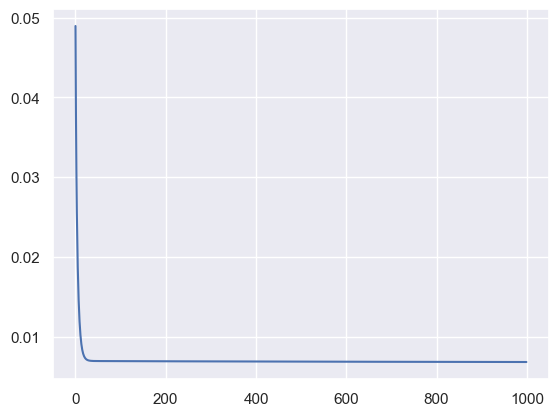

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(cost_lst)

In [35]:
theta

array([ 0.25677597,  0.12264177,  0.04812356, -0.035757  ])